# PUMP IT UP
## Predict operating condition of a waterpoint

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline 

In [2]:
X = pd.read_csv('train_features.csv')
y = pd.read_csv('train_labels.csv')
df = pd.concat([X, y.drop('id', axis=1)], axis=1)

In [3]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_seq_items', 80)

**Labels**
 - `functional` - the waterpoint is operational and there are no repairs needed
 - `functional needs repair` - the waterpoint is operational, but needs repairs
 - `non functional` - the waterpoint is not operational

### 1. Feature discription
**General infromation about pump**
 - `amount_tsh` - Total static head (amount water available to waterpoint)
 - `date_recorded` - The date the row was entered
 - `funder` - Who funded the well
 - `gps_height` - Altitude of the well
 - `installer` - Organization that installed the well
 - `longitude` - GPS coordinate
 - `latitude` - GPS coordinate

**Can assume that this is locations of a basins**
 - `wpt_name` - Name of the waterpoint if there is one
 - `num_private` -
 - `basin` - Geographic water basin
 - `subvillage` - Geographic location
 - `region` - Geographic location
 - `region_code` - Geographic location. It's coded region
 - `district_code` - Geographic location. It's coded district


**Scheme and scheme_managment look as identical but is has to be investigated**
 - `lga` - Geographic location of the district of the village with people
 - `ward` - Geographic location of village which people use well
 - `population` - Population around the well
 - `public_meeting` - True/False (for water?)
 - `recorded_by` - Consulting corporation that provieds the data
 - `scheme_management` - Who operates the waterpoint
 - `scheme_name` - Who operates the waterpoint. Complicated names of specific types of the operating.
 - `permit` - If the waterpoint is permitted
 - `construction_year` - Year the waterpoint was constructed
 - `extraction_type` - The kind of extraction the waterpoint uses. Fisrt scale
 - `extraction_type_group` - The kind of extraction the waterpoint uses. Second scale
 - `extraction_type_class` - The kind of extraction the waterpoint uses. Third scale
 - `management` - How the waterpoint is managed
 - `management_group` - How the waterpoint is managed
 - `payment` - What the water costs
 - `payment_type` - What the water costs. Duplicates 'payment'

**As well we have almost the same values in both this features (only 356 are differ) we will drop 'quality_group'.**
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water

**Source and source_type almost match. Source has some not important values. May be can combine them into one 'other'**
 - `quantity` - The quantity of water
 - `quantity_group` - The quantity of water. Duplicates 'quantity'
 - `source` - The source of the water
 - `source_type` - The source of the water
 - `source_class` - The source of the water
 

**Water_type_group almost matches water_type. Will drop it.**
 - `waterpoint_type` - The kind of waterpoint
 - `waterpoint_type_group` - The kind of waterpoint

### 2. Data cleaning

#### A lot of vairables are copies of others. Some of them extends others. Let's take a look.

In [4]:
df.num_private.value_counts()[:5]

0    58643
6       81
1       73
5       46
8       46
Name: num_private, dtype: int64

In [5]:
df.groupby(['waterpoint_type_group', 'waterpoint_type']).count()

id  amount_tsh  \
waterpoint_type_group waterpoint_type                                  
cattle trough         cattle trough                  116         116   
communal standpipe    communal standpipe           28522       28522   
                      communal standpipe multiple   6103        6103   
dam                   dam                              7           7   
hand pump             hand pump                    17488       17488   
improved spring       improved spring                784         784   
other                 other                         6380        6380   

                                                   date_recorded  funder  \
waterpoint_type_group waterpoint_type                                      
cattle trough         cattle trough                          116     113   
communal standpipe    communal standpipe                   28522   25778   
                      communal standpipe multiple           6103    6064   
dam                   dam                                      7       7   
hand pump             hand pump                            17488   16997   
improved spring       improved spring                        784     743   
other                 other                                 6380    6063   

                                                   gps_height  installer  \
waterpoint_type_group waterpoint_type                                      
cattle trough         cattle trough                       116        110   
communal standpipe    communal standpipe                28522      25790   
                      communal standpipe multiple        6103       6063   
dam                   dam                                   7          7   
hand pump             hand pump                         17488      16977   
improved spring       improved spring                     784        748   
other                 other                              6380       6050   

                                                   longitude  latitude  \
waterpoint_type_group waterpoint_type                                    
cattle trough         cattle trough                      116       116   
communal standpipe    communal standpipe               28522     28522   
                      communal standpipe multiple       6103      6103   
dam                   dam                                  7         7   
hand pump             hand pump                        17488     17488   
improved spring       improved spring                    784       784   
other                 other                             6380      6380   

                                                   wpt_name  num_private  \
waterpoint_type_group waterpoint_type                                      
cattle trough         cattle trough                     116          116   
communal standpipe    communal standpipe              28522        28522   
                      communal standpipe multiple      6103         6103   
dam                   dam                                 7            7   
hand pump             hand pump                       17488        17488   
improved spring       improved spring                   784          784   
other                 other                            6380         6380   

                                                   basin  subvillage  region  \
waterpoint_type_group waterpoint_type                                          
cattle trough         cattle trough                  116         116     116   
communal standpipe    communal standpipe           28522       28407   28522   
                      communal standpipe multiple   6103        5859    6103   
dam                   dam                              7           7       7   
hand pump             hand pump                    17488       17485   17488   
improved spring       improved spring                784         784     784   
other                 other                

In [6]:
df.groupby(['source_type', 'source']).count()

id  amount_tsh  date_recorded  \
source_type          source                                                   
borehole             hand dtw                874         874            874   
                     machine dbh           11075       11075          11075   
dam                  dam                     656         656            656   
other                other                   212         212            212   
                     unknown                  66          66             66   
rainwater harvesting rainwater harvesting   2295        2295           2295   
river/lake           lake                    765         765            765   
                     river                  9612        9612           9612   
shallow well         shallow well          16824       16824          16824   
spring               spring                17021       17021          17021   

                                           funder  gps_height  installer  \
source_type          source                                                
borehole             hand dtw                 868         874        868   
                     machine dbh            10252       11075      10246   
dam                  dam                      647         656        646   
other                other                    204         212        204   
                     unknown                   45          66         46   
rainwater harvesting rainwater harvesting    2099        2295       2096   
river/lake           lake                     763         765        762   
                     river                   8715        9612       8721   
shallow well         shallow well           16302       16824      16286   
spring               spring                 15870       17021      15870   

                                           longitude  latitude  wpt_name  \
source_type          source                                                
borehole             hand dtw                    874       874       874   
                     machine dbh               11075     11075     11075   
dam                  dam                         656       656       656   
other                other                       212       212       212   
                     unknown                      66        66        66   
rainwater harvesting rainwater harvesting       2295      2295      2295   
river/lake           lake                        765       765       765   
                     river                      9612      9612      9612   
shallow well         shallow well              16824     16824     16824   
spring               spring                    17021     17021     17021   

                                           num_private  basin  subvillage  \
source_type          source                                                 
borehole             hand dtw                      874    874         874   
                     machine dbh                 11075  11075       10849   
dam                  dam                           656    656         656   
other                other                         212    212         212   
                     unknown                        66     66          66   
rainwater harvesting rainwater harvesting         2295   2295        2293   
river/lake           lake                          765    765         764   
                     river                        9612   9612        9612   
shallow well         shallow well                16824  16824       16817   
spring               spring                      17021  17021       16886   

                                           region  region_code  district_code  \
source_type          source                                                     
borehole             hand dtw                 874          874            874   
                     machine dbh            11075        11075          11075   
dam                  d

In [7]:
df.groupby(['source_class', 'source_type']).count()

id  amount_tsh  date_recorded  funder  \
source_class source_type                                                      
groundwater  borehole              11949       11949          11949   11120   
             shallow well          16824       16824          16824   16302   
             spring                17021       17021          17021   15870   
surface      dam                     656         656            656     647   
             rainwater harvesting   2295        2295           2295    2099   
             river/lake            10377       10377          10377    9478   
unknown      other                   278         278            278     249   

                                   gps_height  installer  longitude  latitude  \
source_class source_type                                                        
groundwater  borehole                   11949      11114      11949     11949   
             shallow well               16824      16286      16824     16824   
             spring                     17021      15870      17021     17021   
surface      dam                          656        646        656       656   
             rainwater harvesting        2295       2096       2295      2295   
             river/lake                 10377       9483      10377     10377   
unknown      other                        278        250        278       278   

                                   wpt_name  num_private  basin  subvillage  \
source_class source_type                                                      
groundwater  borehole                 11949        11949  11949       11723   
             shallow well             16824        16824  16824       16817   
             spring                   17021        17021  17021       16886   
surface      dam                        656          656    656         656   
             rainwater harvesting      2295         2295   2295        2293   
             river/lake               10377        10377  10377       10376   
unknown      other                      278          278    278         278   

                                   region  region_code  district_code    lga  \
source_class source_type                                                       
groundwater  borehole               11949        11949          11949  11949   
             shallow well           16824        16824          16824  16824   
             spring                 17021        17021          17021  17021   
surface      dam                      656          656            656    656   
             rainwater harvesting    2295         2295           2295   2295   
             river/lake             10377        10377          10377  10377   
unknown      other                    278          278            278    278   

                                    ward  population  public_meeting  \
source_class source_type                                               
groundwater  borehole              11949       11949           11040   
             shallow well          16824       16824           15522   
             spring                17021       17021           16384   
surface      dam                     656         656             614   
             rainwater harvesting   2295        2295            2089   
             river/lake            10377       10377           10171   
unknown      other                   278         278             246   

                                   recorded_by  scheme_management  \
source_class source_type                                            
groundwater  borehole                    11949              11444   
             shallow well                16824              14127   
             spring                      17021              16755   
surface      dam                           656                644   
             rainwater harvesting         2295               2065   
             river/lake        

In [8]:
df.groupby(['quantity_group', 'quantity']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
quantity_group,quantity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dry,dry,6246,6246,6246,5781,6246,5782,6246,6246,6246,6246,6246,6087,6246,6246,6246,6246,6246,6246,5786,6246,5974,3546,5836,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246
enough,enough,33186,33186,33186,31963,33186,31964,33186,33186,33186,33186,33186,33087,33186,33186,33186,33186,33186,33186,31366,33186,31610,18363,31979,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186
insufficient,insufficient,15129,15129,15129,13950,15129,13940,15129,15129,15129,15129,15129,15020,15129,15129,15129,15129,15129,15129,14569,15129,13710,8053,13934,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129
seasonal,seasonal,4050,4050,4050,3414,4050,3415,4050,4050,4050,4050,4050,4046,4050,4050,4050,4050,4050,4050,3872,4050,3740,932,3901,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050
unknown,unknown,789,789,789,657,789,644,789,789,789,789,789,789,789,789,789,789,789,789,473,789,489,340,694,789,789,789,789,789,789,789,789,789,789,789,789,789,789,789,789


In [9]:
df.groupby(['quality_group', 'water_quality']).count()

id  amount_tsh  date_recorded  funder  \
quality_group water_quality                                                  
colored       coloured              490         490            490     391   
fluoride      fluoride              200         200            200     181   
              fluoride abandoned     17          17             17      17   
good          soft                50818       50818          50818   47945   
milky         milky                 804         804            804     788   
salty         salty                4856        4856           4856    4803   
              salty abandoned       339         339            339     331   
unknown       unknown              1876        1876           1876    1309   

                                  gps_height  installer  longitude  latitude  \
quality_group water_quality                                                    
colored       coloured                   490        391        490       490   
fluoride      fluoride                   200        176        200       200   
              fluoride abandoned          17         17         17        17   
good          soft                     50818      47948      50818     50818   
milky         milky                      804        785        804       804   
salty         salty                     4856       4801       4856      4856   
              salty abandoned            339        331        339       339   
unknown       unknown                   1876       1296       1876      1876   

                                  wpt_name  num_private  basin  subvillage  \
quality_group water_quality                                                  
colored       coloured                 490          490    490         490   
fluoride      fluoride                 200          200    200         200   
              fluoride abandoned        17           17     17          17   
good          soft                   50818        50818  50818       50666   
milky         milky                    804          804    804         804   
salty         salty                   4856         4856   4856        4638   
              salty abandoned          339          339    339         338   
unknown       unknown                 1876         1876   1876        1876   

                                  region  region_code  district_code    lga  \
quality_group water_quality                                                   
colored       coloured               490          490            490    490   
fluoride      fluoride               200          200            200    200   
              fluoride abandoned      17           17             17     17   
good          soft                 50818        50818          50818  50818   
milky         milky                  804          804            804    804   
salty         salty                 4856         4856           4856   4856   
              salty abandoned        339          339            339    339   
unknown       unknown               1876         1876           1876   1876   

                                   ward  population  public_meeting  \
quality_group water_quality                                           
colored       coloured              490         490             478   
fluoride      fluoride              200         200             197   
              fluoride abandoned     17          17              16   
good          soft                50818       50818           48437   
milky         milky                 804         804             736   
salty         salty                4856        4856            4485   
              salty abandoned       339         339             239   
unknown       unknown              1876        1876            1478   

                                  recorded_by  scheme_management  scheme_name  \
quality_group water_quality                                                     
colored   

In [10]:
df.groupby(['payment_type', 'payment']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
payment_type,payment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
annually,pay annually,3642,3642,3642,3533,3642,3529,3642,3642,3642,3642,3642,3591,3642,3642,3642,3642,3642,3642,3626,3642,3604,2355,3585,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642
monthly,pay monthly,8300,8300,8300,8084,8300,8083,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8226,8300,7877,5970,8221,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300
never pay,never pay,25348,25348,25348,23440,25348,23443,25348,25348,25348,25348,25348,25246,25348,25348,25348,25348,25348,25348,24594,25348,23604,11385,23776,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348
on failure,pay when scheme fails,3914,3914,3914,3869,3914,3872,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3896,3914,3793,1264,3777,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914
other,other,1054,1054,1054,1038,1054,1039,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,977,1054,1028,220,995,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
per bucket,pay per bucket,8985,8985,8985,8717,8985,8711,8985,8985,8985,8985,8985,8767,8985,8985,8985,8985,8985,8985,8552,8985,8816,6707,8700,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985
unknown,unknown,8157,8157,8157,7084,8157,7068,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,6195,8157,6801,3333,7290,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157


In [11]:
df.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).count()

id  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                    26780   
handpump              afridev               afridev                     1770   
                      india mark ii         india mark ii               2400   
                      india mark iii        india mark iii                98   
                      nira/tanira           nira/tanira                 8154   
                      other handpump        other - mkulima/shinyanga      2   
                                            other - play pump             85   
                                            other - swn 81               229   
                                            walimi                        48   
                      swn 80                swn 80                      3670   
motorpump             mono                  mono                        2865   
                      other motorpump       cemo                          90   
                                            climax                        32   
other                 other                 other                       6430   
rope pump             rope pump             other - rope pump            451   
submersible           submersible           ksb                         1415   
                                            submersible                 4764   
wind-powered          wind-powered          windmill                     117   

                                                                       amount_tsh  \
extraction_type_class extraction_type_group extraction_type                         
gravity               gravity               gravity                         26780   
handpump              afridev               afridev                          1770   
                      india mark ii         india mark ii                    2400   
                      india mark iii        india mark iii                     98   
                      nira/tanira           nira/tanira                      8154   
                      other handpump        other - mkulima/shinyanga           2   
                                            other - play pump                  85   
                                            other - swn 81                    229   
                                            walimi                             48   
                      swn 80                swn 80                           3670   
motorpump             mono                  mono                             2865   
                      other motorpump       cemo                               90   
                                            climax                             32   
other                 other                 other                            6430   
rope pump             rope pump             other - rope pump                 451   
submersible           submersible           ksb                              1415   
                                            submersible                      4764   
wind-powered          wind-powered          windmill                          117   

                                                                       date_recorded  \
extraction_type_class extraction_type_group extraction_type                            
gravity               gravity               gravity                            26780   
handpump              afridev               afridev                             1770   
                      india mark ii         india mark ii                       2400   
                      india mark iii        india mark iii                        98   
                      nira/tanira           nira/tanira                         8154   
                      other handpump        other - mkulima/shinyanga              2   
                                            other - play pump       

In [12]:
df.groupby(['management_group', 'management']).count()

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             685         685            685     663   
                 private operator   1971        1971           1971    1957   
                 trust                78          78             78      78   
                 water authority     904         904            904     836   
other            other               844         844            844     837   
                 other - school       99          99             99      99   
parastatal       parastatal         1768        1768           1768    1624   
unknown          unknown             561         561            561     533   
user-group       vwc               40507       40507          40507   37632   
                 water board        2933        2933           2933    2715   
                 wua                2535        2535           2535    2308   
                 wug                6515        6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        663        685       685   
                 private operator        1971       1959       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        831        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1626       1768      1768   
unknown          unknown                  561        527        561       561   
user-group       vwc                    40507      37630      40507     40507   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2309       2535      2535   
                 wug                     6515       6473       6515      6515   

                                   wpt_name  num_private  basin  subvillage  \
management_group management                                                   
commercial       company                685          685    685         685   
                 private operator      1971         1971   1971        1932   
                 trust                   78           78     78          78   
                 water authority        904          904    904         895   
other            other                  844          844    844         839   
                 other - school          99           99     99          99   
parastatal       parastatal            1768         1768   1768        1768   
unknown          unknown                561          561    561         561   
user-group       vwc                  40507        40507  40507       40189   
                 water board           2933         2933   2933        2933   
                 wua                   2535         2535   2535        2535   
                 wug                   6515         6515   6515        6515   

                                   region  region_code  district_code    lga  \
management_group management                                                    
commercial       company              685          685            685    685   
                 private operator    1971         1971           1971   1971   
                 trust                 78           78             78     78   
                 water authority      904          904            904    904   
other            other                844          844            844    844   
                 other - school        99           99             99     99   
parastatal       parastatal          1768        

In [13]:
df.date_recorded = pd.to_datetime(X.date_recorded)

In [14]:
df.drop(labels=['num_private', 'waterpoint_type_group', 'source_class', 'source', 'quantity_group', 'water_quality', 'payment', 'extraction_type_class', 'extraction_type_group', 'region', 'management_group'], axis=1, inplace=True)

In [15]:
df.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,vwc,annually,good,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,per bucket,good,enough,dam,communal standpipe multiple,functional


#### There are a lot geographic features, we will drop some of them. And 'recorded_by' is constatnt for a whole set. From 'date_recorded' we will create an age of a pump, then drop it.

In [16]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                3635
gps_height               0
installer             3655
longitude                0
latitude                 0
wpt_name                 0
basin                    0
subvillage             371
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting        3334
recorded_by              0
scheme_management     3877
scheme_name          28166
permit                3056
construction_year        0
extraction_type          0
management               0
payment_type             0
quality_group            0
quantity                 0
source_type              0
waterpoint_type          0
status_group             0
dtype: int64

In [17]:
# 'wpt_name' has a lot of unique classes, will drop it.
df.wpt_name.nunique()

37400

In [18]:
# 'subvillage' has a lot of unique classes, will drop it.
df.subvillage.nunique()

19287

In [19]:
# Have a lot of missing data, and a lot of unique classes, will drop it.
df.scheme_name.nunique()

2696

In [20]:
# 'lga' and 'ward' is represent the same but 'lga' has large scale. Will drop 'ward'
df.groupby(['lga', 'ward']).count()[60:80]

id  amount_tsh  date_recorded  funder  gps_height  \
lga      ward                                                                
Bagamoyo Mbwewe          72          72             72      72          72   
         Miono           40          40             40      40          40   
         Mkange          13          13             13      12          13   
         Msata           73          73             73      73          73   
         Talawanda        5           5              5       5           5   
         Ubenazamozi      8           8              8       8           8   
         Vigwaza         26          26             26      26          26   
         Yombo          106         106            106     106         106   
         Zinga/Ikerege  141         141            141     141         141   
Bahi     Babayu          10          10             10      10          10   
         Bahi            17          17             17      17          17   
         Chali            5           5              5       5           5   
         Chibelela       12          12             12      12          12   
         Chikola         10          10             10      10          10   
         Chipanga        14          14             14      14          14   
         Ibihwa           9           9              9       9           9   
         Ibugule          6           6              6       6           6   
         Ilindi           4           4              4       4           4   
         Kigwe           26          26             26      26          26   
         Lamaiti         12          12             12      11          12   

                        installer  longitude  latitude  wpt_name  basin  \
lga      ward                                                             
Bagamoyo Mbwewe                72         72        72        72     72   
         Miono                 40         40        40        40     40   
         Mkange                12         13        13        13     13   
         Msata                 73         73        73        73     73   
         Talawanda              5          5         5         5      5   
         Ubenazamozi            8          8         8         8      8   
         Vigwaza               26         26        26        26     26   
         Yombo                106        106       106       106    106   
         Zinga/Ikerege        141        141       141       141    141   
Bahi     Babayu                10         10        10        10     10   
         Bahi                  17         17        17        17     17   
         Chali                  5          5         5         5      5   
         Chibelela             12         12        12        12     12   
         Chikola               10         10        10        10     10   
         Chipanga              14         14        14        14     14   
         Ibihwa                 9          9         9         9      9   
         Ibugule                6          6         6         6      6   
         Ilindi                 4          4         4         4      4   
         Kigwe                 26         26        26        26     26   
         Lamaiti               11         12        12        12     12   

                        subvillage  region_code  district_code  population  \
lga      ward                                                                
Bagamoyo Mbwewe                 72           72             72          72   
         Miono                  40           40             40          40   
         Mkange                 13           13             13          13   
         Msata                  73           73             73          73   
         Talawanda               5            5              5           5   
         Ubenazamozi             8            8              8           8   
         Vigwaza                2

In [21]:
df.drop(labels=['recorded_by', 'wpt_name', 'subvillage', 'scheme_name', 'ward'], axis=1, inplace=True)

In [22]:
df.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,VWC,False,1999,gravity,vwc,annually,good,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,NaN,Other,True,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional


### 3. Filling NAs


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   amount_tsh         59400 non-null  float64       
 2   date_recorded      59400 non-null  datetime64[ns]
 3   funder             55765 non-null  object        
 4   gps_height         59400 non-null  int64         
 5   installer          55745 non-null  object        
 6   longitude          59400 non-null  float64       
 7   latitude           59400 non-null  float64       
 8   basin              59400 non-null  object        
 9   region_code        59400 non-null  int64         
 10  district_code      59400 non-null  int64         
 11  lga                59400 non-null  object        
 12  population         59400 non-null  int64         
 13  public_meeting     56066 non-null  object        
 14  scheme

In [24]:
df.shape

(59400, 25)

In [25]:
df.scheme_management.replace(to_replace='None', value=np.nan, inplace=True)
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64

In [26]:
print("True's part is", (51011 / (51011 + 5055)))
df.public_meeting.value_counts()

True's part is 0.909838404737274


True     51011
False     5055
Name: public_meeting, dtype: int64

In [27]:
df.public_meeting.fillna(value=True, inplace=True)

In [28]:
df.public_meeting.value_counts()

True     54345
False     5055
Name: public_meeting, dtype: int64

In [29]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management    3878
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

In [30]:
df[(df.funder.isnull() == True) | (df.funder.isnull() == True) | (df.permit.isnull() == True)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group
34,41583,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Rufiji,60,63,Mafia,100,True,VWC,False,0,nira/tanira,vwc,never pay,salty,enough,shallow well,hand pump,functional
43,19282,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Internal,13,2,Singida Rural,1,True,VWC,NaN,1980,mono,vwc,unknown,unknown,dry,borehole,communal standpipe,non functional
47,13620,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Lake Nyasa,12,4,Rungwe,0,True,VWC,NaN,0,gravity,vwc,never pay,good,enough,spring,communal standpipe,functional
65,51072,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Internal,13,2,Singida Rural,1,True,VWC,NaN,1970,mono,vwc,unknown,unknown,dry,borehole,communal standpipe,non functional
71,17386,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Rufiji,12,7,Mbarali,0,True,VWC,False,0,gravity,vwc,never pay,good,insufficient,river/lake,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,46563,0.0,2013-02-19,NaN,1635,NaN,34.971841,-5.098362,Internal,13,2,Singida Rural,1,True,VWC,NaN,1980,nira/tanira,vwc,unknown,unknown,dry,shallow well,hand pump,non functional
59366,55232,0.0,2013-02-02,NaN,1541,NaN,34.765729,-5.027725,Internal,13,2,Singida Rural,200,True,VWC,NaN,2000,nira/tanira,vwc,never pay,good,insufficient,shallow well,hand pump,functional
59370,14796,200.0,2013-01-29,NaN,1154,NaN,30.058731,-4.902633,Lake Tanganyika,16,2,Kasulu,1,True,NaN,False,0,other,unknown,monthly,unknown,unknown,other,other,functional
59376,34716,0.0,2013-02-03,NaN,1581,NaN,34.821039,-5.076258,Internal,13,2,Singida Rural,1,True,VWC,NaN,1990,other,vwc,unknown,unknown,dry,shallow well,other,non functional


In [31]:
df.fillna(df.groupby(['region_code', 'district_code'])['construction_year'].transform('median'), inplace=True)

In [32]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management    3878
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

In [33]:
4273 / 59400 * 100

7.193602693602694

In [34]:
3635 / 59400 * 100

6.11952861952862

In [35]:
#drop ward
#data["funder"].fillna("other", inplace=True)
#data["scheme_management"].fillna("other", inplace=True)
#data["installer"].fillna("other", inplace=True)

#### Dealing with construction year

In [36]:
df.construction_year.value_counts()[:15]

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
Name: construction_year, dtype: int64

In [37]:
# 1/3 jf 'construction_year' is filled with zeros. So, it's NAs.
df.construction_year.replace(to_replace=0, value=np.nan, inplace=True)

In [38]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                3635
gps_height               0
installer             3655
longitude                0
latitude                 0
basin                    0
region_code              0
district_code            0
lga                      0
population               0
public_meeting           0
scheme_management     3878
permit                3056
construction_year    20709
extraction_type          0
management               0
payment_type             0
quality_group            0
quantity                 0
source_type              0
waterpoint_type          0
status_group             0
dtype: int64

In [39]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,38691.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,15.297003,5.629747,179.909983,1996.814686
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,17.587406,9.633649,471.482176,12.472045
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,1960.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,5.000000,2.000000,0.000000,1987.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,12.000000,3.000000,25.000000,2000.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000,215.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,30500.000000,2013.000000


In [40]:
df[df.construction_year.isnull() == True].shape

(20709, 25)

In [41]:
df.groupby('region_code').construction_year.value_counts()[:20]

region_code  construction_year
2            2000.0               484
             1990.0               169
             2010.0               168
             2012.0               167
             2002.0               160
             2008.0               150
             2007.0               144
             2009.0               144
             1998.0               133
             2011.0               115
             2003.0               107
             2005.0               104
             1978.0                95
             1980.0                94
             1970.0                84
             2006.0                84
             1999.0                77
             1995.0                58
             2013.0                39
             2001.0                38
Name: construction_year, dtype: int64

In [42]:
# We will fill NAs in 'construction_year' with median with regard to 'region_code'

df.construction_year.fillna(df.groupby('region_code').construction_year.transform('median'), inplace=True)

In [43]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management    3878
permit               3056
construction_year    8819
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

In [44]:
# We don't cover all of them. Let's do it again with 'district_code'

df.construction_year.fillna(df.groupby('district_code').construction_year.transform('median'), inplace=True)

In [45]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management    3878
permit               3056
construction_year      23
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

In [46]:
# Still have some. Now it's just median over all values

df.construction_year.fillna(df.construction_year.median(), inplace=True)

In [47]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management    3878
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

#### Dealing with geographic coordinates

In [48]:
df.longitude.value_counts().sort_index(ascending=True)[:80]

0.000000     1812
29.607122       1
29.607201       1
29.610321       1
29.610965       1
             ... 
40.323402       1
40.325226       1
40.325240       1
40.344301       1
40.345193       1
Name: longitude, Length: 57516, dtype: int64

In [49]:
df.latitude.value_counts().sort_index(ascending=True)[:80]

-1.164944e+01       1
-1.164838e+01       1
-1.158630e+01       1
-1.156858e+01       1
-1.156680e+01       1
                 ... 
-9.991170e-01       1
-9.990121e-01       1
-9.989160e-01       1
-9.984644e-01       1
-2.000000e-08    1812
Name: latitude, Length: 57517, dtype: int64

In [50]:
# So, latitude is ok, but longitude has NAN as zeros.

df.longitude.replace(to_replace=0.0, value=np.nan, inplace=True)

In [51]:
df.longitude.isnull().sum()

1812

In [52]:
# Let's combine well's coordinates accroding to region nad district and fill NAs with mean.
df.longitude.fillna(df.groupby(['region_code', 'district_code']).longitude.transform('mean'), inplace=True)

In [53]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude             488
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management    3878
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

In [54]:
# Still have sum. Let's group only by region.

df.longitude.fillna(df.groupby('region_code').longitude.transform('mean'), inplace=True)

In [55]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management    3878
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

#### As well we have to many classes in both 'funder' and 'installer',
#### let's create class 'other' for NAs.

In [56]:
df.funder.fillna(value='other', inplace=True)
df.installer.fillna(value='other', inplace=True)
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder                  0
gps_height              0
installer               0
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management    3878
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

#### Let's group some managmenet features.

In [57]:
print(df.scheme_management.nunique())
print(df.management.nunique())

11
12


In [58]:
df[df.scheme_management.isnull() == True]['management'].unique()

array(['other', 'wug', 'vwc', 'private operator', 'unknown', 'parastatal',
       'company', 'wua', 'water authority', 'trust'], dtype=object)

In [59]:
df.groupby('scheme_management')['management'].value_counts()[:20]

scheme_management  management      
Company            company              674
                   private operator     224
                   vwc                  135
                   parastatal            25
                   other                  2
                   wug                    1
Other              other                519
                   wug                  113
                   private operator      64
                   vwc                   41
                   water authority       19
                   unknown                8
                   parastatal             1
                   trust                  1
Parastatal         parastatal          1568
                   private operator      59
                   vwc                   47
                   unknown                4
                   water authority        1
                   water board            1
Name: management, dtype: int64

In [60]:
# There are a lot of cross-variable classes. I assume, that the most suitable fill there will be class 'other'

df.scheme_management.fillna(value='other', inplace=True)

In [61]:
df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder                  0
gps_height              0
installer               0
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
lga                     0
population              0
public_meeting          0
scheme_management       0
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity                0
source_type             0
waterpoint_type         0
status_group            0
dtype: int64

#### Dealing with permit.

In [62]:
print("True's part is", (38852 / (17492 + 38852) * 100))
print('This much is missing:', (59400 - 17492 - 38852) / 59400 * 100)
df.permit.value_counts()

True's part is 68.95499077097827
This much is missing: 5.144781144781145


True     38852
False    17492
Name: permit, dtype: int64

In [63]:
df.groupby(['public_meeting']).permit.value_counts()

public_meeting  permit
False           False      2380
                True       2308
True            True      36544
                False     15112
Name: permit, dtype: int64

In [64]:
df[df.permit.isnull() == True].public_meeting.value_counts()

True     2689
False     367
Name: public_meeting, dtype: int64

In [65]:
# Will fill NA's with regard to obsrevations.

df.permit.fillna(method='pad', inplace=True)

In [66]:
# Ratio of permit's classes with regard to public_meeting did not changed.

df.groupby(['public_meeting']).permit.value_counts()

public_meeting  permit
False           True       2561
                False      2494
True            True      38396
                False     15949
Name: permit, dtype: int64

In [67]:
df.isnull().sum()

id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region_code          0
district_code        0
lga                  0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
quality_group        0
quantity             0
source_type          0
waterpoint_type      0
status_group         0
dtype: int64

### 4. Let's visualize our 'clean' data

<AxesSubplot:xlabel='region_code', ylabel='count'>

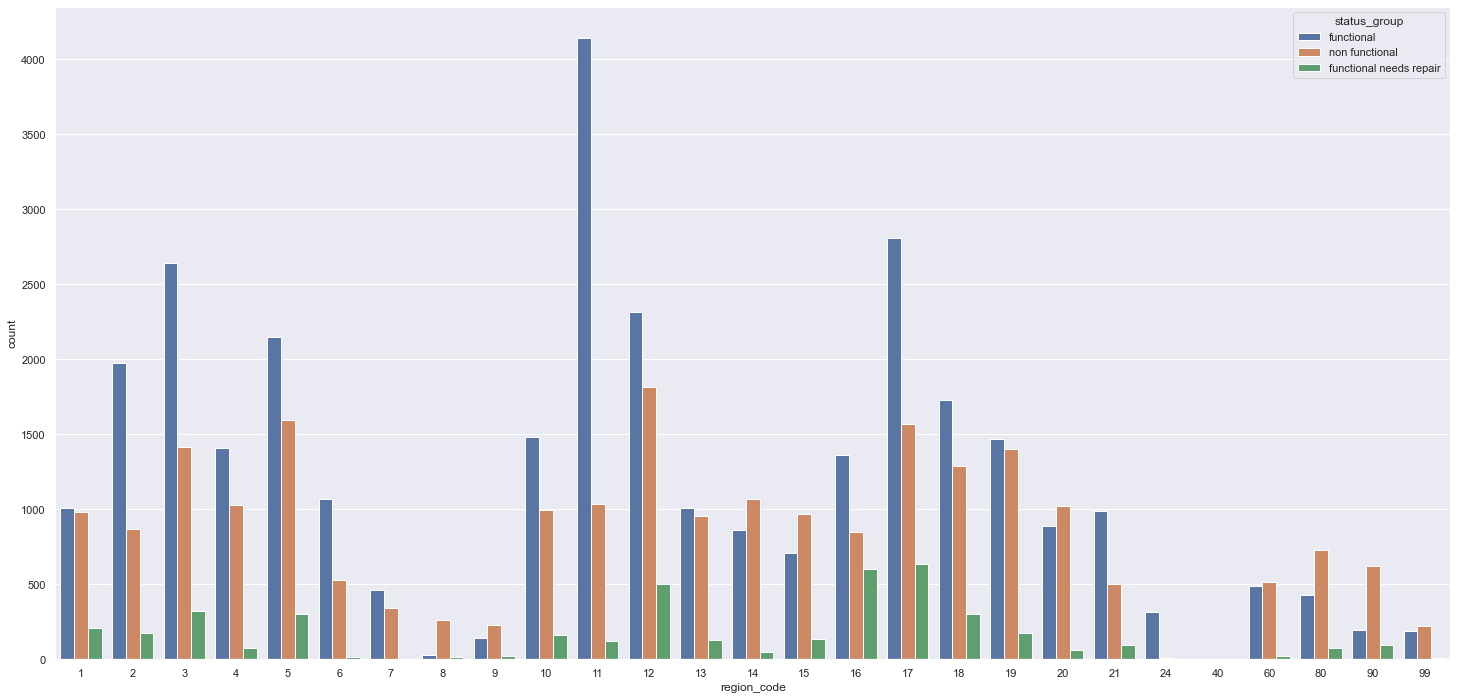

In [68]:
plt.figure(figsize=(25,12))
sns.countplot(data=df, x='region_code', hue='status_group')

<AxesSubplot:xlabel='district_code', ylabel='count'>

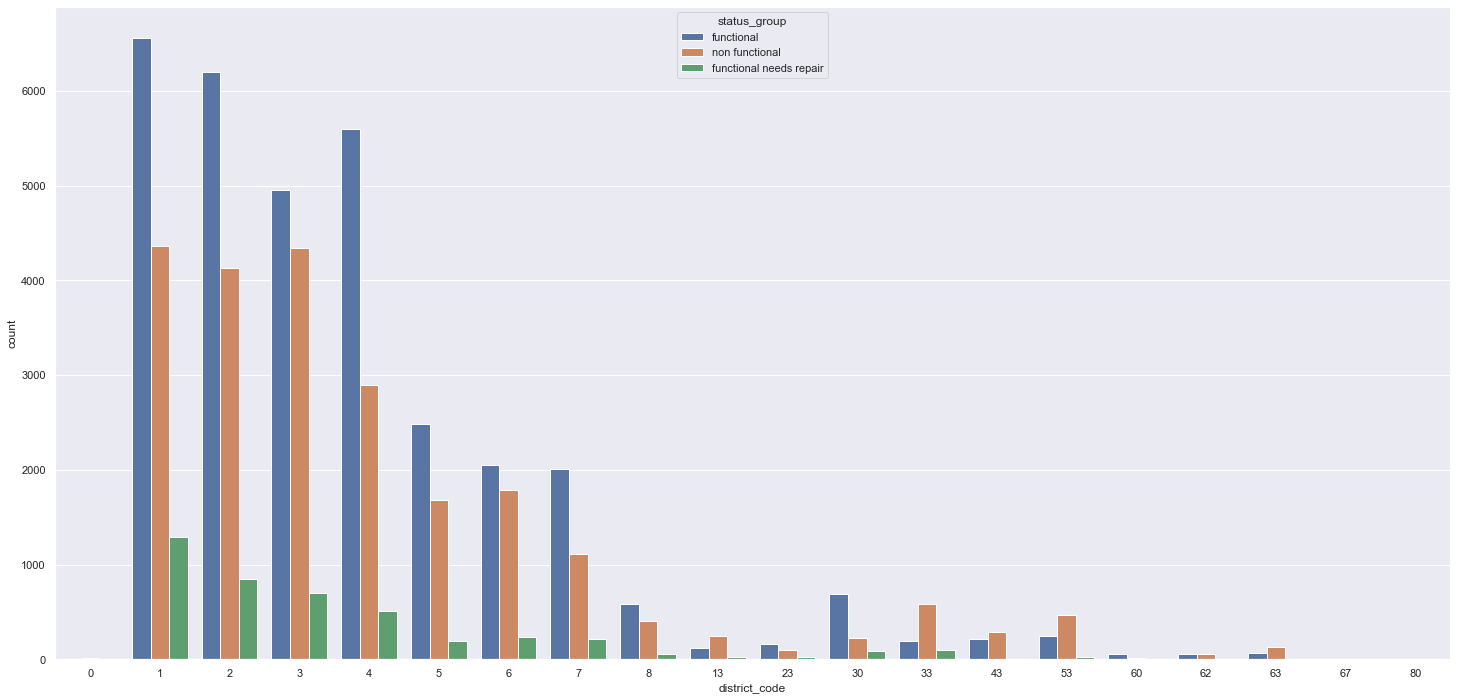

In [69]:
plt.figure(figsize=(25,12))
sns.countplot(data=df, x='district_code', hue='status_group')

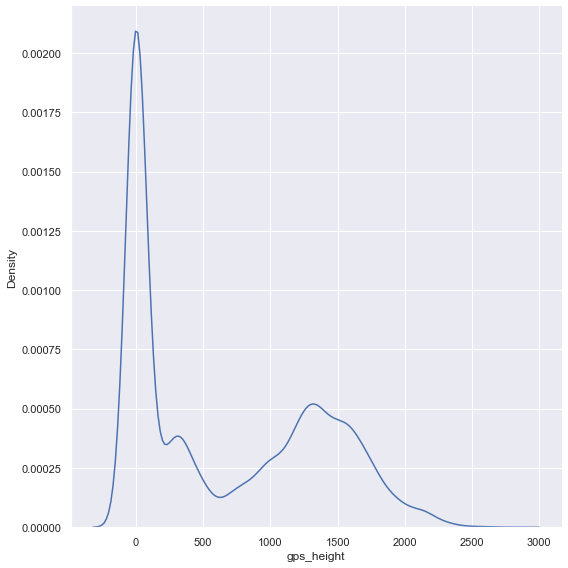

In [70]:
sns.displot(data=df, x='gps_height', kind='kde', height=8);

In [71]:
df.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,VWC,False,1999.0,gravity,vwc,annually,good,enough,spring,communal standpipe,functional


<AxesSubplot:xlabel='status_group', ylabel='Count'>

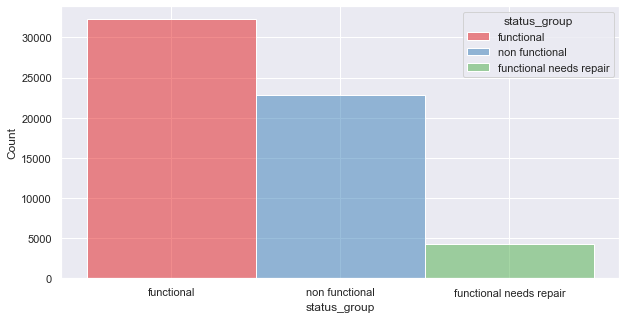

In [72]:
sns.set(rc={'figure.figsize': (10,5)})
sns.histplot(data=df, x='status_group', palette='Set1', hue='status_group')

<AxesSubplot:xlabel='extraction_type', ylabel='count'>

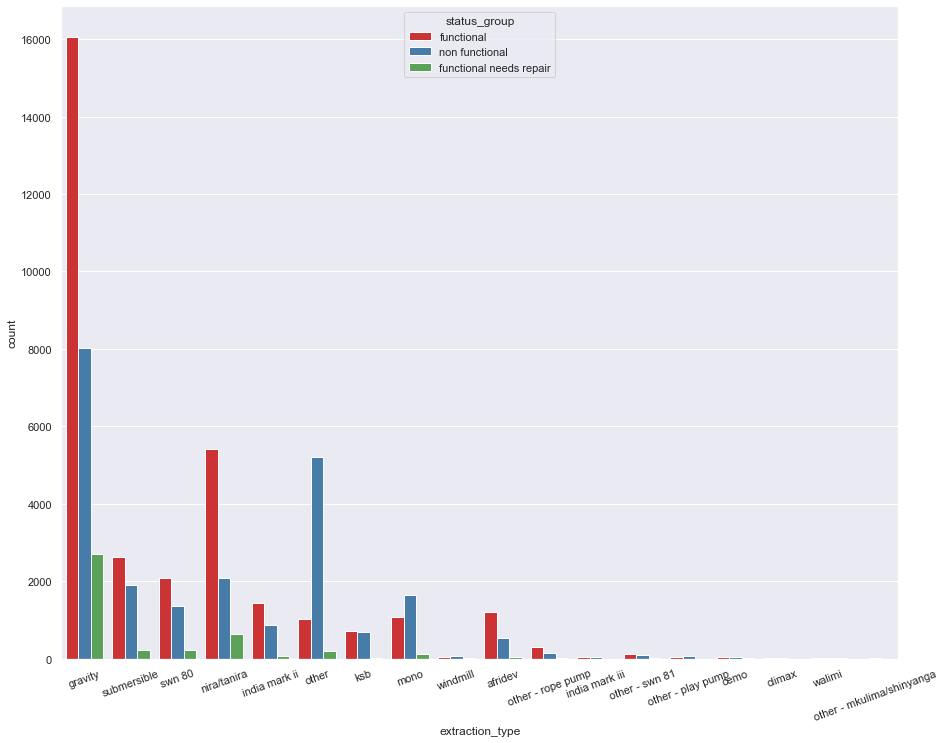

In [73]:
sns.set(rc={'figure.figsize': (15,12)})
plt.xticks(rotation=20)
sns.countplot(data=df, x='extraction_type', palette='Set1', hue='status_group')

<AxesSubplot:xlabel='waterpoint_type', ylabel='count'>

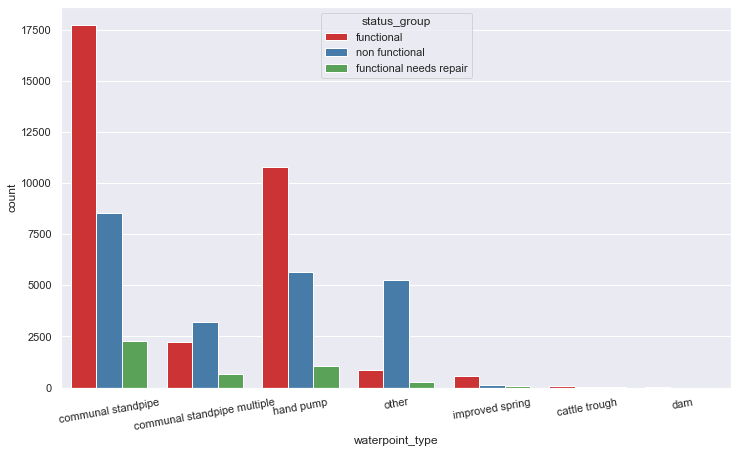

In [74]:
sns.set(rc={'figure.figsize': (12,7)})
plt.xticks(rotation=10)
sns.countplot(data=df, x='waterpoint_type', palette='Set1', hue='status_group')

<AxesSubplot:xlabel='quantity', ylabel='count'>

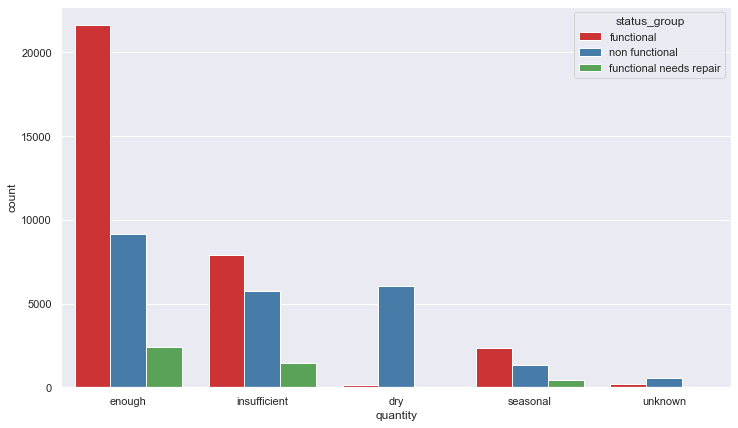

In [75]:
sns.set(rc={'figure.figsize': (12,7)})
sns.countplot(data=df, x='quantity', palette='Set1', hue='status_group')

<AxesSubplot:xlabel='quality_group', ylabel='count'>

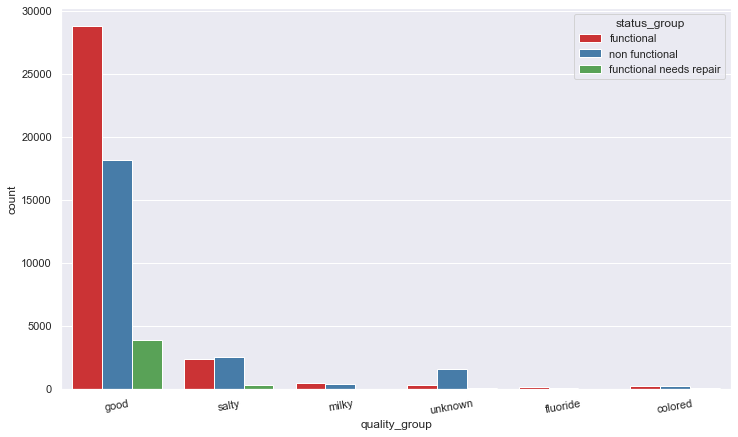

In [76]:
sns.set(rc={'figure.figsize': (12,7)})
plt.xticks(rotation=10)
sns.countplot(data=df, x='quality_group', palette='Set1', hue='status_group')

<AxesSubplot:xlabel='basin', ylabel='count'>

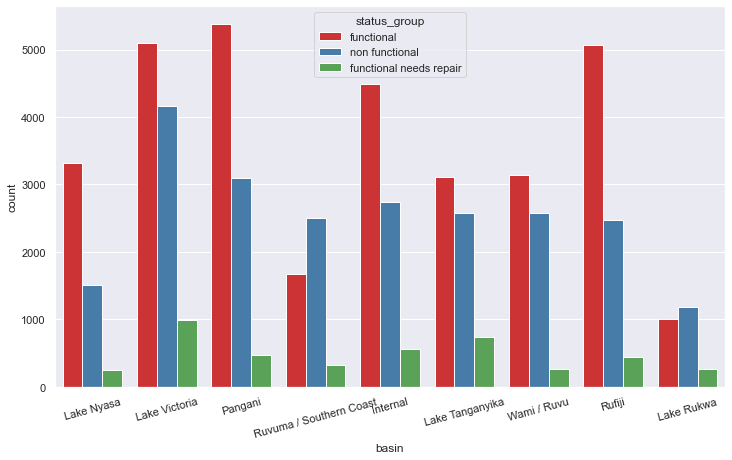

In [77]:
sns.set(rc={'figure.figsize': (12,7)})
plt.xticks(rotation=15)
sns.countplot(data=df, x='basin', palette='Set1', hue='status_group')

# cerating age of a pump
def _create_age(recorded, constructed):
    if constructed != np.nan:
        return recorded.year - constructed
    else:
        return np.nan

df['age'] = df[['date_recorded', 'construction_year']].apply(lambda x: _create_age(x[0], x[1]), axis=1)
df.drop(labels='date_recorded', axis=1, inplace=True)

### 4. Decreasing number of classes
#### 'amount_tsh'

# The first 20 classes by frequency describe 97% of the variable.
# All the others will be put into the 'other' class.
print(df.amount_tsh.value_counts().iloc[:20].sum() / 59400)
df.amount_tsh.value_counts().iloc[:20]

def _amount_tsh(x, col):
    if x not in col:
        x = 'other';
    return x;

col = df.amount_tsh.value_counts().iloc[:20].index
df.amount_tsh = df[['amount_tsh']].applymap(lambda x: _amount_tsh(x, col))

In [78]:
df.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

sns.set(rc={'figure.figsize': (12,7)})
plt.xticks(rotation=10)
sns.countplot(data=df, x='amount_tsh', palette='Set1', hue='status_group')

#### During observation of 'funder' and 'installer' we noted, that it has zeroes as classes. Also, there are some classes, that have different spelling, but they looks the same.
#### Let's put them into class 'other'. Unfortinantly, we cannot decrase amount of classes.


In [79]:
df.installer.replace(to_replace='0', value='other', inplace=True)
df.funder.replace(to_replace='0', value='other', inplace=True)

In [80]:
df.installer.value_counts()[:80].sum() / 5940

7.651515151515151

In [81]:
df.funder.value_counts()[:80].sum() / 59400

0.771969696969697

In [82]:
df.groupby('installer').funder.value_counts()[110:115]

installer        funder       
Adra /Community  Adra             55
Adra/ Community  Adra             17
Adra/Community   Adra             60
Adrs             Adra              1
Af               African Relie    15
Name: funder, dtype: int64

In [83]:
# Wow, so many classes with different representations (check the groupby above). Let's work on it.

df.funder = df.funder.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.installer = df.installer.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.basin = df.basin.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.lga = df.lga.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.scheme_management = df.scheme_management.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.extraction_type = df.extraction_type.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.management = df.management.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.payment_type = df.payment_type.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.quality_group = df.quality_group.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.quantity = df.quantity.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.source_type = df.source_type.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')
df.waterpoint_type = df.waterpoint_type.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('.', '_').str.replace('___', '_').str.replace('__', '_')

In [84]:
df.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,lake_nyasa,11,5,ludewa,109,True,vwc,False,1999.0,gravity,vwc,annually,good,enough,spring,communal_standpipe,functional
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,lake_victoria,20,2,serengeti,280,True,other,True,2010.0,gravity,wug,never_pay,good,insufficient,rainwater_harvesting,communal_standpipe,functional
2,34310,25.0,2013-02-25,lottery_club,686,world_vision,37.460664,-3.821329,pangani,21,4,simanjiro,250,True,vwc,True,2009.0,gravity,vwc,per_bucket,good,enough,dam,communal_standpipe_multiple,functional


#### Let's create variable 'age' from 'date_recorded' and 'construction_year'. Then drop them both

In [85]:
df['age'] = df[['date_recorded', 'construction_year']].apply(lambda x: x[0].year - x[1], axis=1)
df.drop(labels=['date_recorded', 'construction_year'], axis=1, inplace=True)

In [86]:
df.head(3)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,extraction_type,management,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group,age
0,69572,6000.0,roman,1390,roman,34.938093,-9.856322,lake_nyasa,11,5,ludewa,109,True,vwc,False,gravity,vwc,annually,good,enough,spring,communal_standpipe,functional,12.0
1,8776,0.0,grumeti,1399,grumeti,34.698766,-2.147466,lake_victoria,20,2,serengeti,280,True,other,True,gravity,wug,never_pay,good,insufficient,rainwater_harvesting,communal_standpipe,functional,3.0
2,34310,25.0,lottery_club,686,world_vision,37.460664,-3.821329,pangani,21,4,simanjiro,250,True,vwc,True,gravity,vwc,per_bucket,good,enough,dam,communal_standpipe_multiple,functional,4.0


In [87]:
df.management.value_counts()

vwc                 40507
wug                  6515
water_board          2933
wua                  2535
private_operator     1971
parastatal           1768
water_authority       904
other                 844
company               685
unknown               561
other_-_school         99
trust                  78
Name: management, dtype: int64

In [88]:
df.scheme_management.value_counts()

vwc                 36793
wug                  5206
other                4644
water_authority      3153
wua                  2883
water_board          2748
parastatal           1680
private_operator     1063
company              1061
swc                    97
trust                  72
Name: scheme_management, dtype: int64

#### Features 'management' and 'scheme_management' both has "classes-outliers" with not significant number of occurences. Lets drop this rows (it's less then a percent)
#### Also change class 'unknown' of feature 'managment' to class 'other'

In [89]:
df.management.replace(to_replace='other_-_school', value=np.nan, inplace=True)
df.management.replace(to_replace='trust', value=np.nan, inplace=True)

df.scheme_management.replace(to_replace='swc', value=np.nan, inplace=True)
df.scheme_management.replace(to_replace='trust', value=np.nan, inplace=True)

df.dropna(axis=0, inplace=True)

df.management.replace(to_replace='unknown', value='other', inplace=True)

In [90]:
df.management.value_counts()

vwc                 40492
wug                  6514
water_board          2932
wua                  2535
private_operator     1970
parastatal           1767
other                1405
water_authority       903
company               684
Name: management, dtype: int64

In [91]:
df.scheme_management.value_counts()

vwc                 36779
wug                  5206
other                4642
water_authority      3143
wua                  2883
water_board          2746
parastatal           1680
private_operator     1062
company              1061
Name: scheme_management, dtype: int64

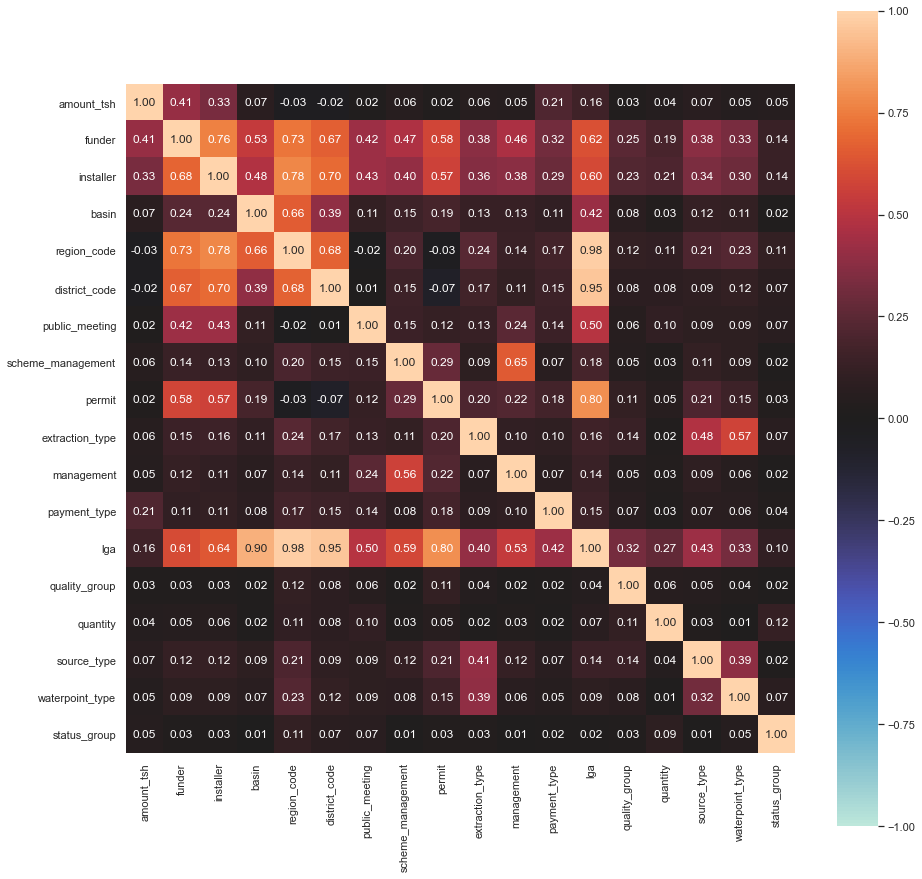

In [93]:
# Cramer's V - analog of the correlation but for
# categorical target and features.
import scipy.stats as ss
from dython.nominal import associations

cramer_v = ['amount_tsh', 'funder', 'installer',
            'basin', 'region_code', 'district_code',
            'public_meeting', 'scheme_management',
            'permit', 'extraction_type', 'management',
            'payment_type', 'lga', 'quality_group',
            'quantity', 'source_type', 'waterpoint_type',
            'status_group']
associations(df[cramer_v], nom_nom_assoc='theil', figsize=(15,15));

In [94]:
#drop 'lga' because it's extremly good correalted with 'region_code' and 'district_code'

df.drop(labels='lga', axis=1, inplace=True)

### 5. Train/test split

In [95]:
df.head(2)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,population,public_meeting,scheme_management,permit,extraction_type,management,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group,age
0,69572,6000.0,roman,1390,roman,34.938093,-9.856322,lake_nyasa,11,5,109,True,vwc,False,gravity,vwc,annually,good,enough,spring,communal_standpipe,functional,12.0
1,8776,0.0,grumeti,1399,grumeti,34.698766,-2.147466,lake_victoria,20,2,280,True,other,True,gravity,wug,never_pay,good,insufficient,rainwater_harvesting,communal_standpipe,functional,3.0


In [172]:
from sklearn.model_selection import train_test_split

X = df.drop(labels=['id', 'status_group'], axis=1)
y = df[['status_group']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

In [115]:
print(f'Verification of splitiing: {X.shape[0]} / ({X_test.shape[0]} + {X_train.shape[0]}) = ', X_train.shape[0] / (X_test.shape[0] + X_train.shape[0]))

Verification of splitiing: 59202 / (5921 + 53281) =  0.8999864869430086


In [116]:
y_train.status_group.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [117]:
y_train[y_train.status_group == 'functional'].shape[0] / (y_test[y_test.status_group == 'functional'].shape[0] + y_train[y_train.status_group == 'functional'].shape[0])

0.8977156177156177

In [118]:
y_train[y_train.status_group == 'non functional'].shape[0] / (y_test[y_test.status_group == 'non functional'].shape[0] + y_train[y_train.status_group == 'non functional'].shape[0])

0.90328828630541

In [119]:
y_train[y_train.status_group == 'functional needs repair'].shape[0] / (y_test[y_test.status_group == 'functional needs repair'].shape[0] + y_train[y_train.status_group == 'functional needs repair'].shape[0])

0.8995359628770302

In [173]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

### Random Forest for First Runs and Feature Selection

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

rfc = RandomForestClassifier()

col_cod = ['funder', 'installer', 'basin', 'region_code', 'district_code',
           'public_meeting', 'scheme_management', 'permit', 'extraction_type',
           'management', 'payment_type', 'quality_group', 'quantity',
           'source_type', 'waterpoint_type']

for col in col_cod:
    X_train[col] = LabelEncoder().fit_transform(X_train[col])
    X_test[col] = LabelEncoder().fit_transform(X_test[col])

hyper_param = {'max_depth': [80, 90],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [3, 5],
               'min_samples_split': [8, 10],
               'n_estimators': [100, 200, 300]}


grid_rfc = GridSearchCV(rfc, hyper_param, scoring='f1_micro', n_jobs=-1)

grid_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_micro')

In [145]:
y_hat = grid_rfc.predict(X_test)
print(grid_rfc.best_params_)
f1_score(y_test, y_hat, average='micro')

{'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


0.7802736024320216

In [149]:
X_train.drop(labels=['district_code', 'installer', 'scheme_management'], axis=1, inplace=True)
X_test.drop(labels=['district_code', 'installer', 'scheme_management'], axis=1, inplace=True)

grid_rfc_2 = GridSearchCV(rfc, hyper_param, scoring='f1_micro', n_jobs=-1, cv=5)

grid_rfc_2.fit(X_train, y_train.values.ravel())

y_hat_2 = grid_rfc_2.predict(X_test)
print(grid_rfc_2.best_params_)
f1_score(y_test, y_hat_2, average='micro')

{'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


0.7865225468670832

In [163]:
for col in col_cod:
    X_train[col] = LabelEncoder().fit_transform(X_train[col])
    X_test[col] = LabelEncoder().fit_transform(X_test[col])
    
X_train.drop(labels=['district_code', 'installer', 'scheme_management', 'source_type'], axis=1, inplace=True)
X_test.drop(labels=['district_code', 'installer', 'scheme_management', 'source_type'], axis=1, inplace=True)

grid_rfc_3 = GridSearchCV(rfc, hyper_param, scoring='f1_micro', n_jobs=-1, cv=5)

grid_rfc_3.fit(X_train, y_train.values.ravel())

y_hat_3 = grid_rfc_3.predict(X_test)
print(grid_rfc_3.best_params_)
f1_score(y_test, y_hat_3, average='micro')

{'max_depth': 90, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


0.7795980408714744

### The first run of a CatBoostClassifier
#### Note, that there were no sight about uploading the notebook. So, I accidently rerun it and the value of my first run of CatBoostClassifier was dropped.
#### I can't run it again, because it will take a lot of time. Confusion matrix is still here

In [138]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

cat_1 = CatBoostClassifier(iterations=500, learning_rate=0.03, depth=6,
                           l2_leaf_reg=3, loss_function='MultiClass', border_count=32, ctr_target_border_count=50)

idx_cat_feat = [1, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

cat_train = Pool(X_train, y_train, cat_features=idx_cat_feat)
cat_test = Pool(X_test, y_test, cat_features=idx_cat_feat)
cat_1.fit(cat_train)


0:	learn: 1.0763654	total: 2.49s	remaining: 20m 42s
1:	learn: 1.0565732	total: 4.23s	remaining: 17m 33s
2:	learn: 1.0372780	total: 6.76s	remaining: 18m 39s
3:	learn: 1.0189440	total: 9.31s	remaining: 19m 14s
4:	learn: 1.0016211	total: 11.8s	remaining: 19m 31s
5:	learn: 0.9853425	total: 14.6s	remaining: 19m 58s
6:	learn: 0.9701394	total: 17.2s	remaining: 20m 12s
7:	learn: 0.9554356	total: 20.2s	remaining: 20m 42s
8:	learn: 0.9425474	total: 22.4s	remaining: 20m 23s
9:	learn: 0.9296509	total: 26.2s	remaining: 21m 22s
10:	learn: 0.9172199	total: 29.8s	remaining: 22m 3s
11:	learn: 0.9055574	total: 33.3s	remaining: 22m 32s
12:	learn: 0.8947597	total: 36.7s	remaining: 22m 53s
13:	learn: 0.8843996	total: 40.4s	remaining: 23m 21s
14:	learn: 0.8750437	total: 43.8s	remaining: 23m 36s
15:	learn: 0.8655239	total: 47.6s	remaining: 24m
16:	learn: 0.8567563	total: 51.1s	remaining: 24m 11s
17:	learn: 0.8483650	total: 54.6s	remaining: 24m 21s
18:	learn: 0.8407743	total: 57.2s	remaining: 24m 8s
19:	learn

AttributeError: 'CatBoostClassifier' object has no attribute 'predcit'

In [100]:
y_hat = cat_1.predict(cat_test)
f1_score(y_test, y_hat, average='micro')

NameError: name 'cat_1' is not defined

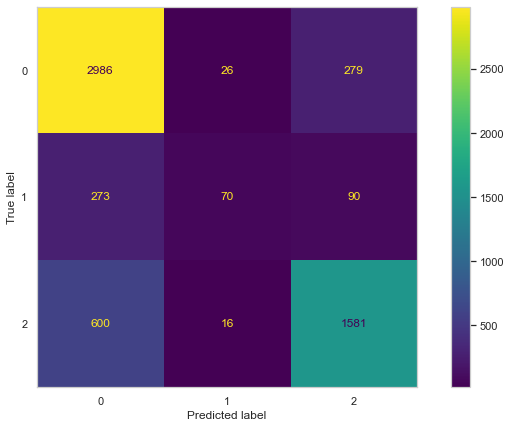

In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_style("whitegrid", {'axes.grid' : False})
conf_matr_1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=cat_1.classes_).plot()